In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download marcbrandner/tlc-trip-record-data-yellow-taxi

100% 27.4G/27.5G [03:03<00:00, 98.1MB/s]
100% 27.5G/27.5G [03:03<00:00, 161MB/s] 


In [ ]:
! unzip tlc-trip-record-data-yellow-taxi.zip

Archive:  tlc-trip-record-data-yellow-taxi.zip
  inflating: data_dictionary_trip_records_yellow.pdf  
  inflating: taxi_zone_lookup.csv    
  inflating: yellow_tripdata_2009-01.parquet  
  inflating: yellow_tripdata_2009-02.parquet  
  inflating: yellow_tripdata_2009-03.parquet  
  inflating: yellow_tripdata_2009-04.parquet  
  inflating: yellow_tripdata_2009-05.parquet  
  inflating: yellow_tripdata_2009-06.parquet  
  inflating: yellow_tripdata_2009-07.parquet  
  inflating: yellow_tripdata_2009-08.parquet  
  inflating: yellow_tripdata_2009-09.parquet  
  inflating: yellow_tripdata_2009-10.parquet  
  inflating: yellow_tripdata_2009-11.parquet  
  inflating: yellow_tripdata_2009-12.parquet  
  inflating: yellow_tripdata_2010-01.parquet  
  inflating: yellow_tripdata_2010-02.parquet  
  inflating: yellow_tripdata_2010-03.parquet  
  inflating: yellow_tripdata_2010-04.parquet  
  inflating: yellow_tripdata_2010-05.parquet  
  inflating: yellow_tripdata_2010-06.parquet  
  inflating: y

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import os

In [ ]:
directory = '/content'
year = '2021'

In [ ]:
# for filename in os.listdir(directory):
#     if filename.endswith('.parquet') and '-01' in filename:
#         # Read the Parquet file into a PyArrow table
#         print(filename)
#         parquet_file = pq.ParquetFile(os.path.join(directory, filename))
#         schema = parquet_file.schema
#         print(schema)


In [ ]:
schema = pa.schema([
    pa.field('VendorID', pa.int64()),
    pa.field('tpep_pickup_datetime', pa.timestamp('us')),
    pa.field('tpep_dropoff_datetime', pa.timestamp('us')),
    pa.field('passenger_count', pa.float64()),
    pa.field('trip_distance', pa.float64()),
    pa.field('RatecodeID', pa.int64()),
    pa.field('store_and_fwd_flag', pa.string()),
    pa.field('PULocationID', pa.int64()),
    pa.field('DOLocationID', pa.int64()),
    pa.field('payment_type', pa.int64()),
    pa.field('fare_amount', pa.float64()),
    pa.field('extra', pa.float64()),
    pa.field('mta_tax', pa.float64()),
    pa.field('tip_amount', pa.float64()),
    pa.field('tolls_amount', pa.float64()),
    pa.field('improvement_surcharge', pa.float64()),
    pa.field('total_amount', pa.float64()),
    # pa.field('congestion_surcharge', pa.null()),
    # pa.field('airport_fee', pa.null())
    pa.field('congestion_surcharge', pa.float64(), metadata={'null replacement value': b'0.0'}),
    pa.field('airport_fee', pa.float64(), metadata={'null replacement value': b'0.0'})
])
table = pa.Table.from_batches([], schema=schema)

In [ ]:
#table = pq.read_table('yellow_tripdata_2012-01.parquet')

In [ ]:
# field_map = {
#     'vendor_id': 'vendor_name',
#     'pickup_datetime': 'Trip_Pickup_DateTime',
#     'dropoff_datetime': 'Trip_Dropoff_DateTime',
#     'passenger_count': 'Passenger_Count',
#     'trip_distance': 'Trip_Distance',
#     'pickup_longitude': 'Start_Lon',
#     'pickup_latitude': 'Start_Lat',
#     'rate_code': 'Rate_Code',
#     'store_and_fwd_flag': 'store_and_forward',
#     'dropoff_longitude': 'End_Lon',
#     'dropoff_latitude': 'End_Lat',
#     'payment_type': 'Payment_Type',
#     'fare_amount': 'Fare_Amt',
#     'surcharge': 'surcharge',
#     'mta_tax': 'mta_tax',
#     'tip_amount': 'Tip_Amt',
#     'tolls_amount': 'Tolls_Amt',
#     'total_amount': 'Total_Amt'
# }

In [ ]:
for filename in os.listdir(directory):
    #if filename.endswith('.parquet') and '2009' not in filename and '2010' not in filename and '2011' not in filename and '2022' not in filename:
    #if filename.endswith('.parquet') and year in filename and 'yellow' in filename and ('-01' in filename or '-02' in filename or '-03' in filename or '-04' in filename or '-05' in filename or '-06' in filename):
    #if filename.endswith('.parquet') and year in filename and 'yellow' in filename and ('-07' in filename or '-08' in filename or '-09' in filename or '-10' in filename or '-11' in filename or '-12' in filename):    
    if filename.endswith('.parquet') and year in filename and 'yellow' in filename:
        # Read the Parquet file into a PyArrow table
        print(filename)
        parquet_file = pq.read_table(os.path.join(directory, filename))
        # print(parquet_file.schema.field(0).name)
        # if parquet_file.schema.field(0).name == 'vendor_id':
        #   mapped_table = parquet_file.rename_columns(field_map)
        #   table = pa.concat_tables([table, mapped_table])
        # # Append the data to the existing table
        # else:
        parquet_file = parquet_file.cast(schema)
        table = pa.concat_tables([table, parquet_file])

yellow_tripdata_2021-05.parquet
yellow_tripdata_2021-07.parquet
yellow_tripdata_2021-09.parquet
yellow_tripdata_2021-06.parquet
yellow_tripdata_2021-11.parquet
yellow_tripdata_2021-02.parquet
yellow_tripdata_2021-08.parquet
yellow_tripdata_2021-04.parquet
yellow_tripdata_2021-03.parquet
yellow_tripdata_2021-01.parquet
yellow_tripdata_2021-12.parquet
yellow_tripdata_2021-10.parquet


In [ ]:
col_names = table.column_names
col_names

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [ ]:
# condition1 = (table['VendorID'] == pa.scalar(1)) | (table['VendorID'] == pa.scalar(2))

In [ ]:
# combined_condition = condition1 | condition2

In [ ]:
# table = table.filter(condition1)

In [ ]:
#table = table.filter[((table['VendorID'] == 1) | (table['VendorID'] == 2)) & (table['passenger_count'] <= 10) & (table['trip_distance'] <= 3000) & (table['RatecodeID'] <= 6) & (table['RatecodeID'] >= 1) & ((table['store_and_fwd_flag'] == 'Y') | (table['store_and_fwd_flag'] == 'N')) & (table['PULocationID'] >= 1) & (table['PULocationID'] <= 265) & (table['DOLocationID'] >= 1) & (table['DOLocationID'] <= 265) & (table['payment_type'] <= 6) & (table['payment_type'] >= 1) & (table['fare_amount'] >= 0) & (table['extra'] >= 0) & ((table['mta_tax'] == 0.0) | (table['mta_tax'] == 0.5)) & (table['tolls_amount'] >= 0) & (table['tolls_amount'] >= 0) & (table['improvement_surcharge'] >= 0) & ((table['congestion_surcharge'] >= 0) | (table['congestion_surcharge'].isnull())) & ((table['airport_fee'] == 0) | (table['airport_fee'] == 1.25) | (table['airport_fee'].isnull()))]

In [ ]:
table = table.to_pandas()
table

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-05-01 00:37:18,2021-05-01 00:41:07,2.0,0.70,1.0,N,141,263,1,5.00,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0
1,1,2021-05-01 00:43:01,2021-05-01 00:49:19,1.0,1.40,1.0,N,263,75,2,6.50,3.0,0.5,0.00,0.0,0.3,10.30,2.5,0.0
2,1,2021-05-01 00:05:54,2021-05-01 00:31:46,1.0,5.70,1.0,N,142,129,2,21.50,3.0,0.5,0.00,0.0,0.3,25.30,2.5,0.0
3,2,2021-05-01 00:08:21,2021-05-01 00:19:20,1.0,3.04,1.0,N,231,97,1,11.50,0.5,0.5,3.06,0.0,0.3,18.36,2.5,0.0
4,2,2021-05-01 00:32:44,2021-05-01 00:48:44,1.0,4.04,1.0,N,148,17,1,15.50,0.5,0.5,5.79,0.0,0.3,25.09,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30904303,2,2021-10-31 23:43:00,2021-11-01 00:05:00,NaN,5.57,NaN,None,232,188,0,27.87,0.0,0.5,8.08,0.0,0.3,39.25,NaN,NaN
30904304,2,2021-10-31 23:31:04,2021-11-01 00:09:42,NaN,8.44,NaN,None,50,80,0,27.16,0.0,0.5,7.92,0.0,0.3,38.38,NaN,NaN
30904305,2,2021-10-31 23:53:00,2021-11-01 00:17:00,NaN,6.33,NaN,None,144,7,0,23.91,0.0,0.5,5.89,0.0,0.3,33.10,NaN,NaN
30904306,2,2021-10-31 23:44:00,2021-11-01 00:19:00,NaN,11.23,NaN,None,186,135,0,37.10,0.0,0.5,12.67,0.0,0.3,53.07,NaN,NaN


In [ ]:
# count_df = table['airport_fee'].value_counts()
# count_df

In [ ]:
# for col_name in col_names:
#   count_df = table[col_name].value_counts(normalize=True) * 100
#   print(count_df)

In [ ]:
# import gc
# gc.collect()

In [ ]:
table = table.loc[((table['VendorID'] == 1) | (table['VendorID'] == 2)) & (table['passenger_count'] <= 10) & (table['trip_distance'] <= 3000) & (table['RatecodeID'] <= 6) & (table['RatecodeID'] >= 1) & ((table['store_and_fwd_flag'] == 'Y') | (table['store_and_fwd_flag'] == 'N')) & (table['PULocationID'] >= 1) & (table['PULocationID'] <= 265) & (table['DOLocationID'] >= 1) & (table['DOLocationID'] <= 265) & (table['payment_type'] <= 6) & (table['payment_type'] >= 1) & (table['fare_amount'] >= 0) & (table['extra'] >= 0) & ((table['mta_tax'] == 0.0) | (table['mta_tax'] == 0.5)) & (table['tolls_amount'] >= 0) & (table['tolls_amount'] >= 0) & ((table['improvement_surcharge'] >= 0) | ((table['improvement_surcharge'].isnull()))) & ((table['congestion_surcharge'] >= 0) | (table['congestion_surcharge'].isnull())) & ((table['airport_fee'] == 0) | (table['airport_fee'] == 1.25) | (table['airport_fee'].isnull()))]

In [ ]:
# table = table.loc[(table['airport_fee'] >= 0.0)]

In [ ]:
table

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-05-01 00:37:18,2021-05-01 00:41:07,2.0,0.70,1.0,N,141,263,1,5.0,3.00,0.5,2.20,0.0,0.3,11.00,2.5,0.00
1,1,2021-05-01 00:43:01,2021-05-01 00:49:19,1.0,1.40,1.0,N,263,75,2,6.5,3.00,0.5,0.00,0.0,0.3,10.30,2.5,0.00
2,1,2021-05-01 00:05:54,2021-05-01 00:31:46,1.0,5.70,1.0,N,142,129,2,21.5,3.00,0.5,0.00,0.0,0.3,25.30,2.5,0.00
3,2,2021-05-01 00:08:21,2021-05-01 00:19:20,1.0,3.04,1.0,N,231,97,1,11.5,0.50,0.5,3.06,0.0,0.3,18.36,2.5,0.00
4,2,2021-05-01 00:32:44,2021-05-01 00:48:44,1.0,4.04,1.0,N,148,17,1,15.5,0.50,0.5,5.79,0.0,0.3,25.09,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767820,1,2021-10-31 23:36:08,2021-11-01 00:02:34,0.0,6.10,1.0,Y,97,76,2,22.5,0.50,0.5,0.00,0.0,0.3,23.80,0.0,0.00
30767821,1,2021-10-31 23:45:27,2021-11-01 00:14:57,1.0,11.00,1.0,N,132,225,1,32.5,1.75,0.5,0.00,0.0,0.3,35.05,0.0,1.25
30767822,2,2021-10-31 23:14:35,2021-10-31 23:29:28,1.0,1.76,1.0,N,90,48,2,11.0,0.50,0.5,0.00,0.0,0.3,14.80,2.5,0.00
30767823,2,2021-10-31 23:52:09,2021-10-31 23:57:29,2.0,1.29,1.0,N,50,239,2,6.5,0.50,0.5,0.00,0.0,0.3,10.30,2.5,0.00


In [ ]:
# for col_name in col_names:
#   count_df = table[col_name].value_counts(normalize=True) * 100
#   print(count_df)

In [ ]:
#table.to_parquet(year + '_1st.parquet')
#table.to_parquet(year + '_2nd.parquet')
#table.to_parquet(year + '.parquet')

In [ ]:
import statsmodels.api as sm

In [ ]:
def calculate_second_in_day(timestamp):
    return timestamp.hour * 3600 + timestamp.minute * 60 + timestamp.second

In [ ]:
# table['sec_pickup'] = table['tpep_pickup_datetime'].apply(calculate_second_in_day)
# table['sec_dropoff'] = table['tpep_dropoff_datetime'].apply(calculate_second_in_day)
table['duration'] = (table['tpep_dropoff_datetime'] - table['tpep_pickup_datetime']).dt.total_seconds()
table.loc[table['duration'] < 0, 'duration'] += 3600*24
table = table[table['duration'] != 0]
table['tpep_pickup_hour'] = table['tpep_pickup_datetime'].apply(lambda x: x.hour)
table['tpep_dropoff_hour'] = table['tpep_dropoff_datetime'].apply(lambda x: x.hour)
table['hour_total'] = table['total_amount'] / table['duration'] * 3600
table['hour_tip'] = table['tip_amount'] / table['duration'] * 3600

<ipython-input-24-cd1fcd11a0c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['duration'] = (table['tpep_dropoff_datetime'] - table['tpep_pickup_datetime']).dt.total_seconds()
<ipython-input-24-cd1fcd11a0c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['tpep_pickup_hour'] = table['tpep_pickup_datetime'].apply(lambda x: x.hour)
<ipython-input-24-cd1fcd11a0c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

<ipython-input-25-1ca15e46eaed>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = table.corr()


<Axes: >

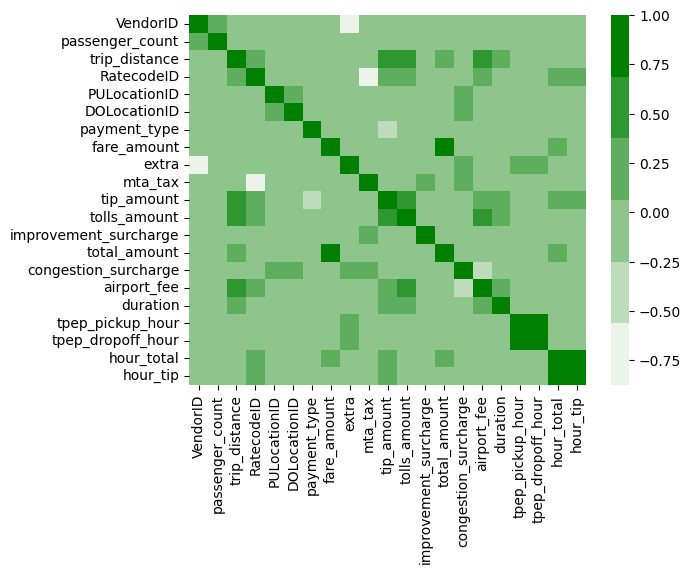

In [ ]:
import seaborn as sns
import pandas as pd


corr_matrix = table.corr()
cmap = sns.light_palette("green")
sns.heatmap(corr_matrix, annot = False,cmap = cmap)
#print(table)


In [ ]:
table

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,tpep_pickup_hour,tpep_dropoff_hour,hour_total,hour_tip
0,1,2021-05-01 00:37:18,2021-05-01 00:41:07,2.0,0.70,1.0,N,141,263,1,...,0.0,0.3,11.00,2.5,0.00,229.0,0,0,172.925764,34.585153
1,1,2021-05-01 00:43:01,2021-05-01 00:49:19,1.0,1.40,1.0,N,263,75,2,...,0.0,0.3,10.30,2.5,0.00,378.0,0,0,98.095238,0.000000
2,1,2021-05-01 00:05:54,2021-05-01 00:31:46,1.0,5.70,1.0,N,142,129,2,...,0.0,0.3,25.30,2.5,0.00,1552.0,0,0,58.685567,0.000000
3,2,2021-05-01 00:08:21,2021-05-01 00:19:20,1.0,3.04,1.0,N,231,97,1,...,0.0,0.3,18.36,2.5,0.00,659.0,0,0,100.297420,16.716237
4,2,2021-05-01 00:32:44,2021-05-01 00:48:44,1.0,4.04,1.0,N,148,17,1,...,0.0,0.3,25.09,2.5,0.00,960.0,0,0,94.087500,21.712500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767820,1,2021-10-31 23:36:08,2021-11-01 00:02:34,0.0,6.10,1.0,Y,97,76,2,...,0.0,0.3,23.80,0.0,0.00,1586.0,23,0,54.022699,0.000000
30767821,1,2021-10-31 23:45:27,2021-11-01 00:14:57,1.0,11.00,1.0,N,132,225,1,...,0.0,0.3,35.05,0.0,1.25,1770.0,23,0,71.288136,0.000000
30767822,2,2021-10-31 23:14:35,2021-10-31 23:29:28,1.0,1.76,1.0,N,90,48,2,...,0.0,0.3,14.80,2.5,0.00,893.0,23,23,59.664054,0.000000
30767823,2,2021-10-31 23:52:09,2021-10-31 23:57:29,2.0,1.29,1.0,N,50,239,2,...,0.0,0.3,10.30,2.5,0.00,320.0,23,23,115.875000,0.000000


In [ ]:
display(table[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'duration', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']])

,passenger_count,trip_distance,RatecodeID,PULocationID,duration,DOLocationID,tpep_pickup_hour,tpep_dropoff_hour
0,2.0,0.70,1.0,141,229.0,263,0,0
1,1.0,1.40,1.0,263,378.0,75,0,0
2,1.0,5.70,1.0,142,1552.0,129,0,0
3,1.0,3.04,1.0,231,659.0,97,0,0
4,1.0,4.04,1.0,148,960.0,17,0,0
...,...,...,...,...,...,...,...,...
30767820,0.0,6.10,1.0,97,1586.0,76,23,0
30767821,1.0,11.00,1.0,132,1770.0,225,23,0
30767822,1.0,1.76,1.0,90,893.0,48,23,23
30767823,2.0,1.29,1.0,50,320.0,239,23,23


In [ ]:
# count_df = table['hour_total'].value_counts()
# print(count_df)
# len(table['hour_total'])
sum = table['total_amount'].sum()
sum

562642718.769999

In [ ]:
count_df = table['duration'].value_counts(normalize=True) * 100
print(count_df)

390.0      0.117682
400.0      0.116633
380.0      0.115963
410.0      0.115949
461.0      0.114821
             ...   
43990.0    0.000003
30354.0    0.000003
10449.0    0.000003
56081.0    0.000003
80540.0    0.000003
Name: duration, Length: 20890, dtype: float64


In [ ]:
# from sklearn.feature_selection import SelectKBest, f_regression
# X = table.drop('total_amount', axis=1)
# y = table['total_amount']

# # use SelectKBest to select top 2 features
# k = 3
# selector = SelectKBest(score_func=f_regression, k=k)
# selector.fit(X, y)

# # get scores and selected feature indices
# scores = selector.scores_
# selected_features = selector.get_support(indices=True)

# # print results
# print('Scores:', scores)
# print('Selected feature indices:', selected_features)

In [ ]:
# X = table[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'duration', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
# X = sm.add_constant(X)
# y = table['total_amount']
# model = sm.OLS(y, X).fit()
# print(model.summary())

In [ ]:
# X = table[['passenger_count', 'trip_distance', 'PULocationID', 'RatecodeID', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
# X = sm.add_constant(X)
# y = table['hour_total']
# model = sm.OLS(y, X).fit()
# print(model.summary())

In [ ]:
# X = table[['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
# X = sm.add_constant(X)
# y = table['hour_total']
# model = sm.OLS(y, X).fit()
# print(model.summary())

In [ ]:
X = table[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'duration', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
X = sm.add_constant(X)
y = table['tip_amount']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                 1.143e+06
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:14:44   Log-Likelihood:            -6.7897e+07
No. Observations:            29255128   AIC:                         1.358e+08
Df Residuals:                29255119   BIC:                         1.358e+08
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1082      0.00

In [ ]:
X = table[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
X = sm.add_constant(X)
y = table['hour_tip']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               hour_tip   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                 3.205e+05
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:15:06   Log-Likelihood:            -2.2538e+08
No. Observations:            29255128   AIC:                         4.508e+08
Df Residuals:                29255120   BIC:                         4.508e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -432.4524      0.55

In [ ]:
# X = table[['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]
# X = sm.add_constant(X)
# y = table['hour_tip']
# model = sm.OLS(y, X).fit()
# print(model.summary())

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LambdaCallback

In [ ]:
X = table[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'tpep_dropoff_hour']]

In [ ]:
y = table['total_amount'] / table['duration']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
def callback(epoch, logs):
    print('Epoch {}: loss = {:.4f}, mse = {:.4f}'.format(epoch+1, logs['loss'], logs['mse']))

In [ ]:
# history = model.fit(X, y, epochs=10, batch_size=32, callbacks=[LambdaCallback(on_epoch_end=callback)])

In [ ]:
# mse = model.evaluate(X_test, y_test, verbose=0)
# print('MSE:', mse)

In [ ]:
# new_data = np.array([[1, 2], [3, 4]])
# predictions = model.predict(new_data)
# print('Predictions:', predictions)